In [2]:
import sklearn
import sklearn.cluster, sklearn.datasets
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import umap
import sklearn.preprocessing
import pandas as pd
from tqdm.auto import tqdm
import math
from scipy.special import gamma
import umap
import scipy
from importlib import reload
import py_subclu as ps

In [917]:
reload(ps)

<module 'py_subclu' from 'C:\\Users\\emmanuel.doumard\\Documents\\These\\Subspace_Clustering\\python_subclu\\py_subclu.py'>

# IRIS

Computing 2-dim clusters


  0%|          | 0/6 [00:00<?, ?it/s]

Computing 3-dim clusters


  0%|          | 0/4 [00:00<?, ?it/s]

Computing 4-dim clusters


  0%|          | 0/1 [00:00<?, ?it/s]

Computing 5-dim clusters


0it [00:00, ?it/s]

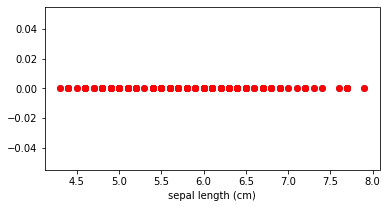

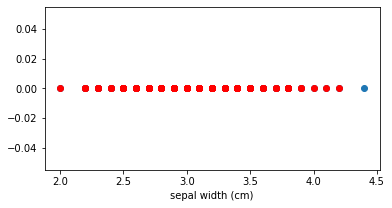

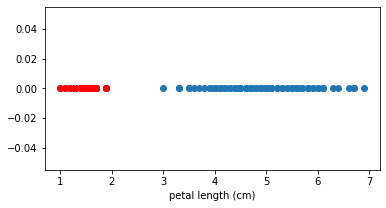

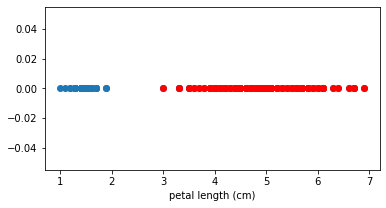

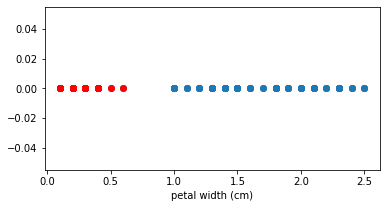

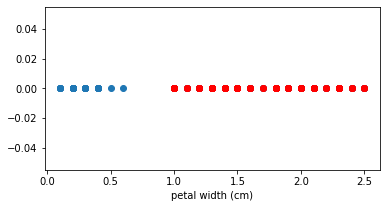

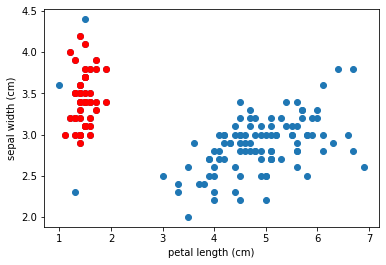

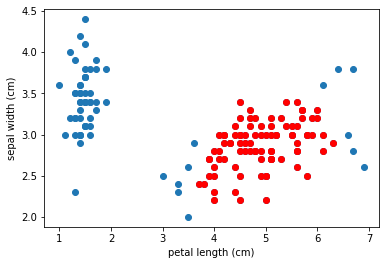

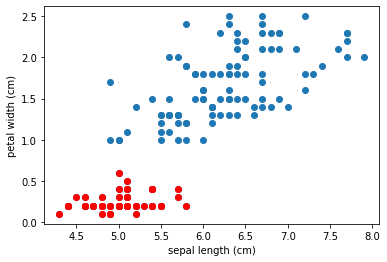

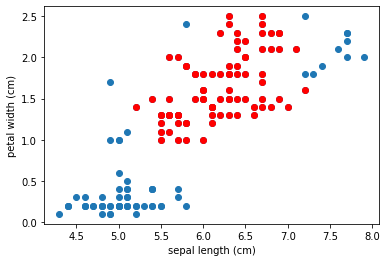

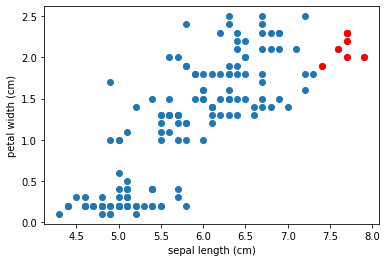

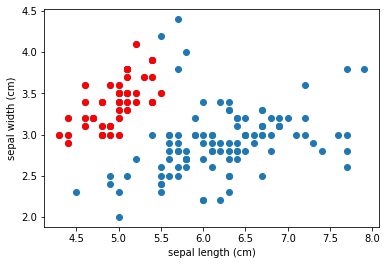

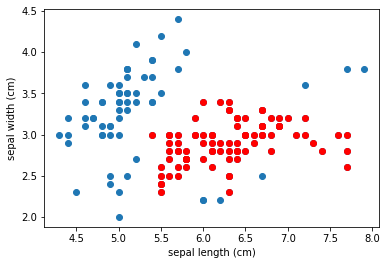

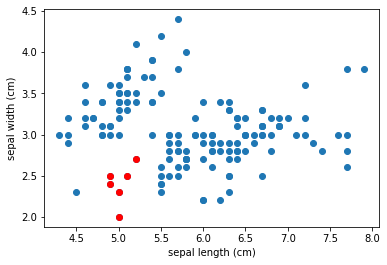

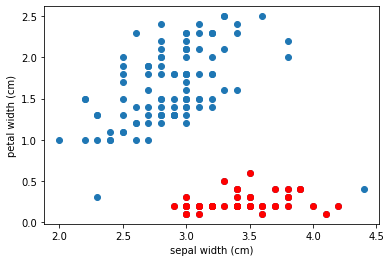

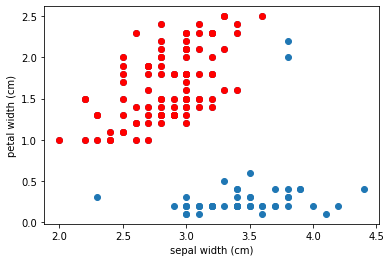

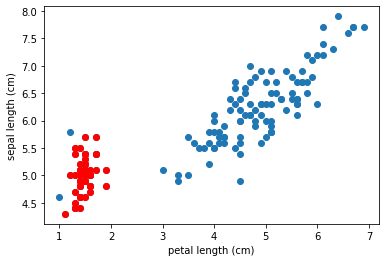

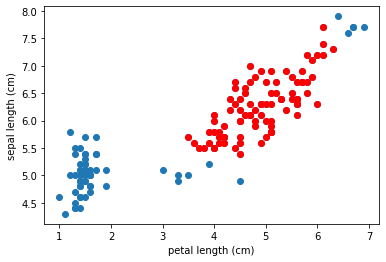

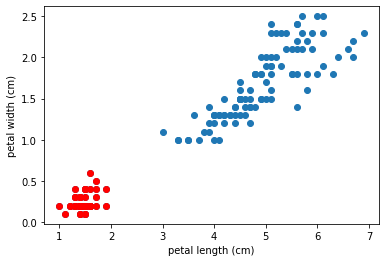

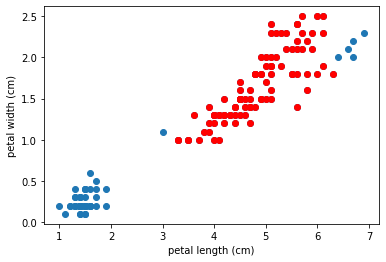

In [909]:
C, S = ps.SUBCLU(iris.data, eps=0.3, m=5)
for cl in C[0]:
    plt.figure(figsize=(6,3))
    plt.scatter(x=iris.data.loc[:,cl.columns[0]],y=np.zeros(iris.data.shape[0]))
    plt.scatter(x=cl.loc[:,cl.columns[0]],y=np.zeros(cl.shape[0]),color='r')
    plt.xlabel(cl.columns[0])
    
for cl in C[1]:
    plt.figure()
    plt.scatter(x=iris.data.loc[:,cl.columns[0]],y=iris.data.loc[:,cl.columns[1]])
    plt.scatter(x=cl.loc[:,cl.columns[0]],y=cl.loc[:,cl.columns[1]],color='r')
    plt.xlabel(cl.columns[0])
    plt.ylabel(cl.columns[1])

In [471]:
reducer = umap.UMAP().fit(sklearn.preprocessing.StandardScaler().fit_transform(iris.data))

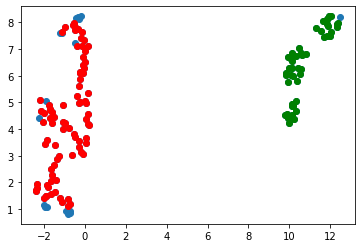

In [488]:
C, S = SUBCLU(iris.data, eps=0.5, m=5)
plt.figure()
plt.scatter(x=reducer.embedding_[:,0],y=reducer.embedding_[:,1])
for i,cl in enumerate(C[3]):
    plt.scatter(x=reducer.embedding_[cl.index,0],y=reducer.embedding_[cl.index,1],color=['g','r','y'][i])

In [500]:
digits = sklearn.datasets.load_digits(as_frame=True)
digits.data.shape

(1797, 64)

# SA-Heart

In [3]:
import openml as oml
oml.config.server='https://www.openml.org/api/v1'
dataset = oml.datasets.get_dataset(1498)
X, y, categorical_indicator, attribute_names = dataset.get_data(
    dataset_format='dataframe',
    target=dataset.default_target_attribute
)
X.shape

(462, 9)

In [4]:
dict_features = {'V1':'systolic blood pressure', 'V2':'cumulative tobacco', 'V3':'low density lipoprotein cholesterol', 'V4':'adiposity', 'V5':'family history of heart disease', 'V6':'type-A behavior', 'V7':'obesity', 'V8':'current alcohol consumption', 'V9':'age'}
X = X.rename(dict_features, axis=1)

In [5]:
X["family history of heart disease"] = X["family history of heart disease"].replace({"1":1,"2":0}).astype(int)
y = y.replace({"1":0,"2":1})

In [859]:
X

,systolic blood pressure,cumulative tobacco,low density lipoprotein cholesterol,adiposity,family history of heart disease,type-A behavior,obesity,current alcohol consumption,age
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49
...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40


In [805]:
X_scaled_no_bin = pd.DataFrame(sklearn.preprocessing.StandardScaler().fit_transform(X.drop("family history of heart disease",axis=1)),columns=X.drop("family history of heart disease",axis=1).columns)
X_min_max_no_bin = pd.DataFrame(sklearn.preprocessing.MinMaxScaler().fit_transform(X.drop("family history of heart disease",axis=1)),columns=X.drop("family history of heart disease",axis=1).columns)

## Avec Family history

Computing 2-dim clusters


  0%|          | 0/36 [00:00<?, ?it/s]

Computing 3-dim clusters


  0%|          | 0/84 [00:00<?, ?it/s]

Computing 4-dim clusters
pruning candidate :  frozenset({'systolic blood pressure', 'family history of heart disease', 'adiposity', 'cumulative tobacco'})
pruning candidate :  frozenset({'current alcohol consumption', 'adiposity', 'systolic blood pressure', 'cumulative tobacco'})
pruning candidate :  frozenset({'current alcohol consumption', 'age', 'adiposity', 'low density lipoprotein cholesterol'})
pruning candidate :  frozenset({'type-A behavior', 'age', 'systolic blood pressure', 'family history of heart disease'})
pruning candidate :  frozenset({'type-A behavior', 'family history of heart disease', 'adiposity', 'low density lipoprotein cholesterol'})
pruning candidate :  frozenset({'age', 'family history of heart disease', 'adiposity', 'low density lipoprotein cholesterol'})
pruning candidate :  frozenset({'family history of heart disease', 'adiposity', 'low density lipoprotein cholesterol', 'cumulative tobacco'})
pruning candidate :  frozenset({'age', 'systolic blood pressure', '

  0%|          | 0/30 [00:00<?, ?it/s]

Computing 5-dim clusters
pruning candidate :  frozenset({'age', 'systolic blood pressure', 'obesity', 'cumulative tobacco', 'family history of heart disease'})
pruning candidate :  frozenset({'age', 'obesity', 'cumulative tobacco', 'family history of heart disease', 'adiposity'})
pruning candidate :  frozenset({'systolic blood pressure', 'cumulative tobacco', 'current alcohol consumption', 'family history of heart disease', 'adiposity'})
pruning candidate :  frozenset({'obesity', 'cumulative tobacco', 'low density lipoprotein cholesterol', 'current alcohol consumption', 'family history of heart disease'})
pruning candidate :  frozenset({'age', 'systolic blood pressure', 'cumulative tobacco', 'low density lipoprotein cholesterol', 'family history of heart disease'})
pruning candidate :  frozenset({'obesity', 'cumulative tobacco', 'current alcohol consumption', 'family history of heart disease', 'adiposity'})
pruning candidate :  frozenset({'systolic blood pressure', 'cumulative tobacco'

  0%|          | 0/4 [00:00<?, ?it/s]

Computing 6-dim clusters
pruning candidate :  frozenset({'age', 'systolic blood pressure', 'obesity', 'cumulative tobacco', 'current alcohol consumption', 'family history of heart disease'})
pruning candidate :  frozenset({'age', 'cumulative tobacco', 'low density lipoprotein cholesterol', 'current alcohol consumption', 'family history of heart disease', 'adiposity'})
pruning candidate :  frozenset({'age', 'obesity', 'cumulative tobacco', 'low density lipoprotein cholesterol', 'current alcohol consumption', 'family history of heart disease'})
pruning candidate :  frozenset({'age', 'systolic blood pressure', 'cumulative tobacco', 'current alcohol consumption', 'family history of heart disease', 'adiposity'})
pruning candidate :  frozenset({'age', 'systolic blood pressure', 'cumulative tobacco', 'low density lipoprotein cholesterol', 'current alcohol consumption', 'family history of heart disease'})
pruning candidate :  frozenset({'age', 'obesity', 'cumulative tobacco', 'current alcohol 

0it [00:00, ?it/s]

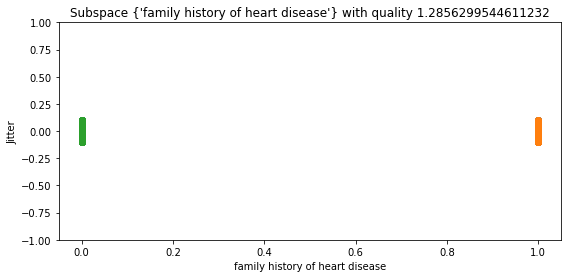

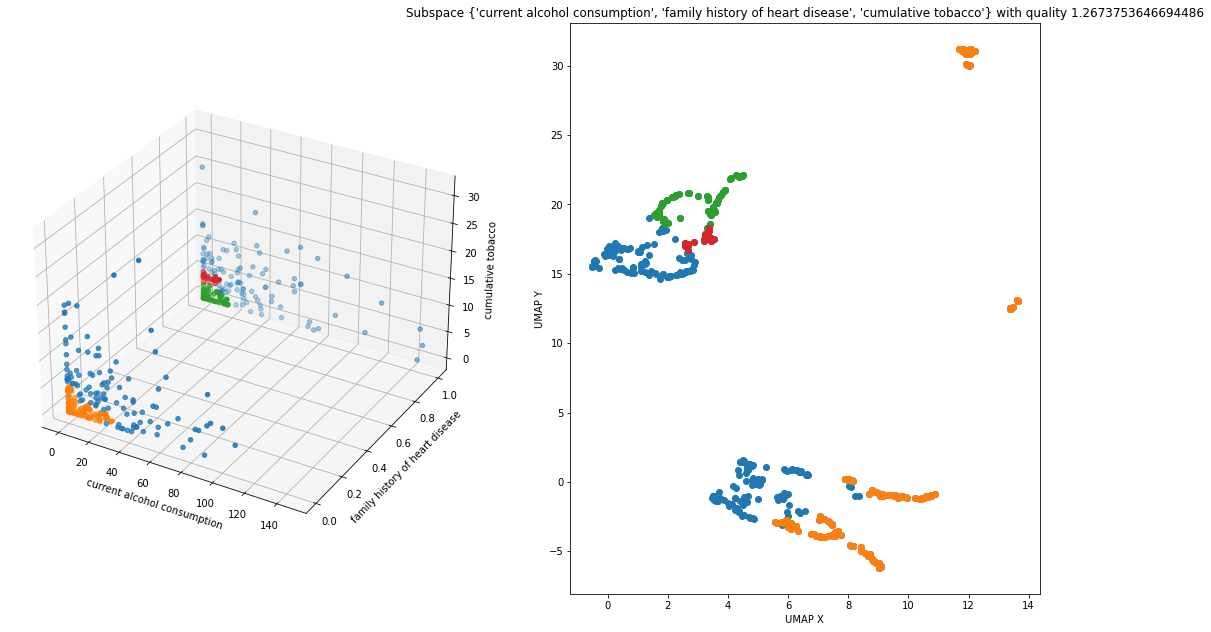

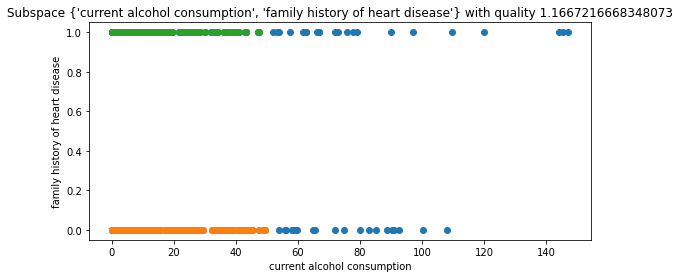

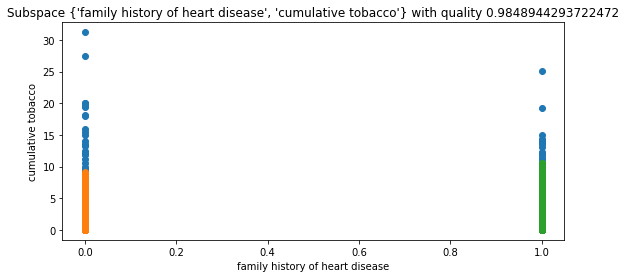

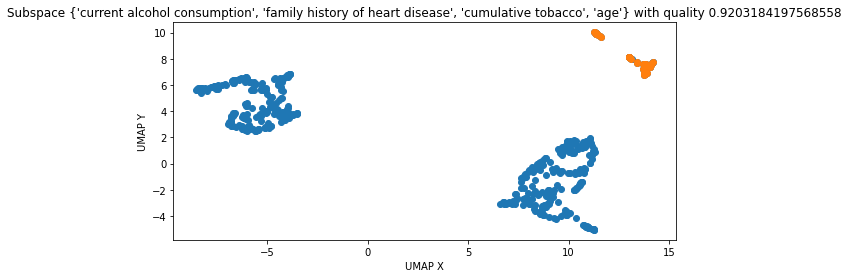

In [929]:
reload(ps)
C_scaled, S_scaled, df_C_scaled = ps.fullSUBCLU(X, eps=0.2, m=10, verbose=1, draw_results=True, draw_limit=5)

## Sans Family history

Computing 2-dim clusters


  0%|          | 0/28 [00:00<?, ?it/s]

Computing 3-dim clusters


  0%|          | 0/56 [00:00<?, ?it/s]

Computing 4-dim clusters


  0%|          | 0/35 [00:00<?, ?it/s]

Computing 5-dim clusters


  0%|          | 0/4 [00:00<?, ?it/s]

Computing 6-dim clusters


0it [00:00, ?it/s]

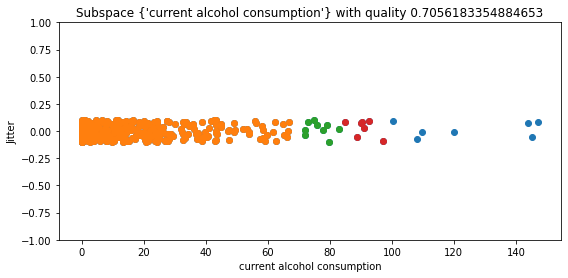

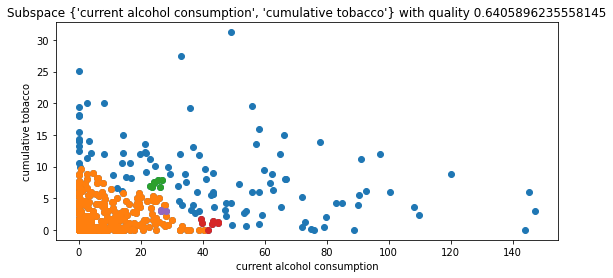

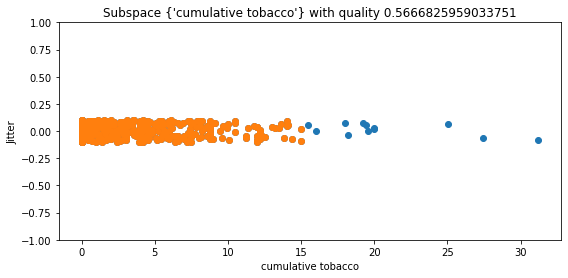

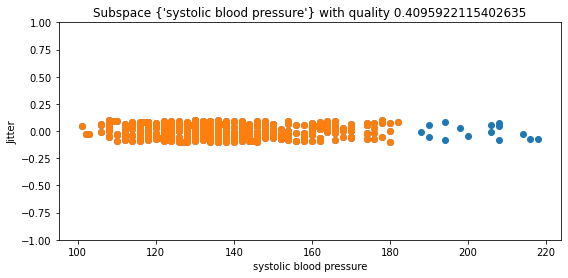

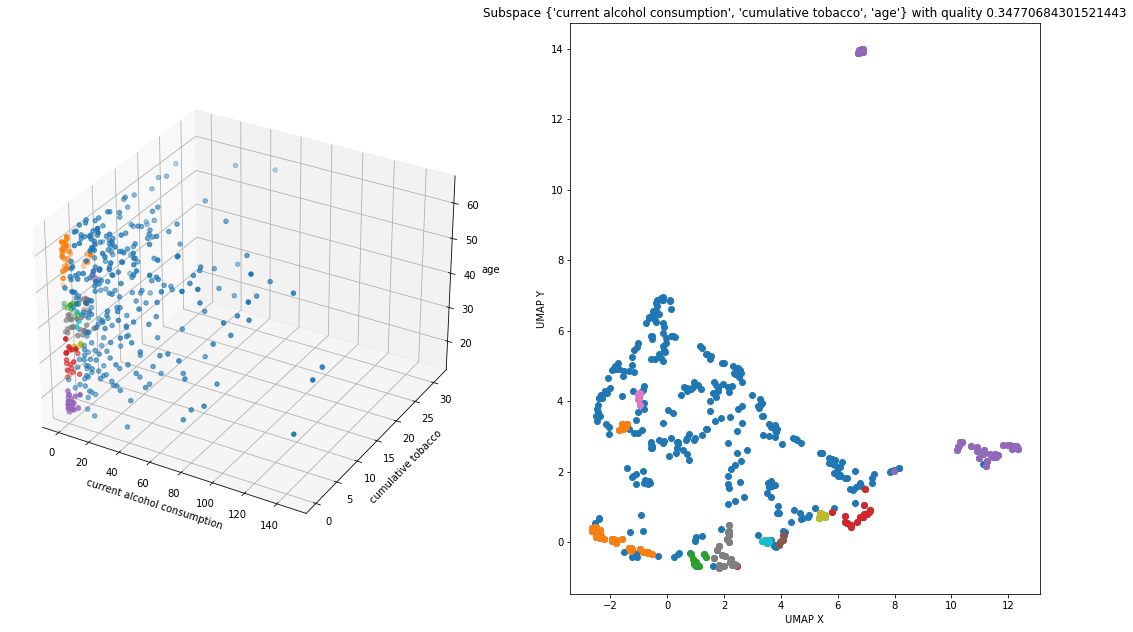

In [943]:
reload(ps)
C_scaled_no_bin, S_scaled_no_bin, df_C_scaled_no_bin = ps.fullSUBCLU(X.drop("family history of heart disease",axis=1), eps=0.2, m=6, verbose=0, draw_results=True, draw_limit=5)

## MinMax

Computing 2-dim clusters


  0%|          | 0/28 [00:00<?, ?it/s]

Computing 3-dim clusters


  0%|          | 0/56 [00:00<?, ?it/s]

Computing 4-dim clusters


  0%|          | 0/70 [00:00<?, ?it/s]

Computing 5-dim clusters


  0%|          | 0/56 [00:00<?, ?it/s]

Computing 6-dim clusters


  0%|          | 0/28 [00:00<?, ?it/s]

Computing 7-dim clusters


  0%|          | 0/8 [00:00<?, ?it/s]

Computing 8-dim clusters


  0%|          | 0/1 [00:00<?, ?it/s]

Computing 9-dim clusters


0it [00:00, ?it/s]

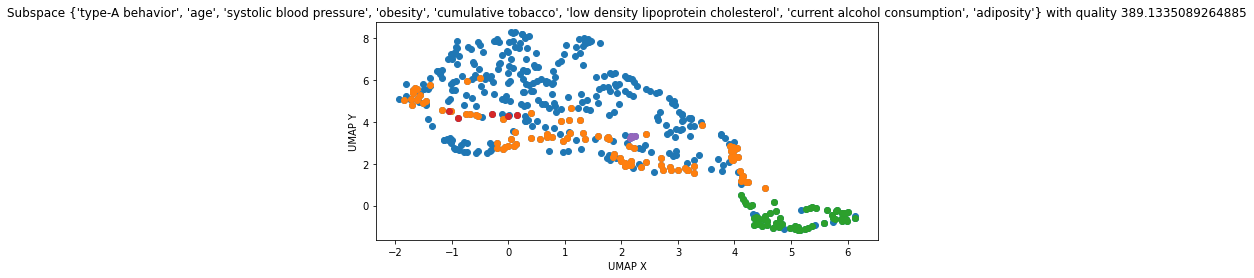

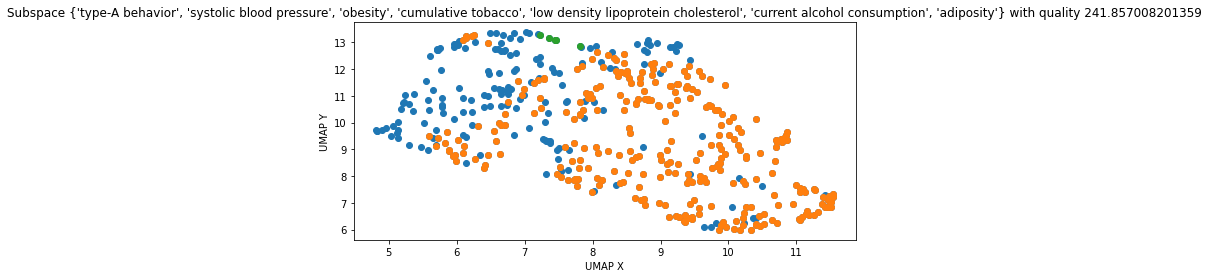

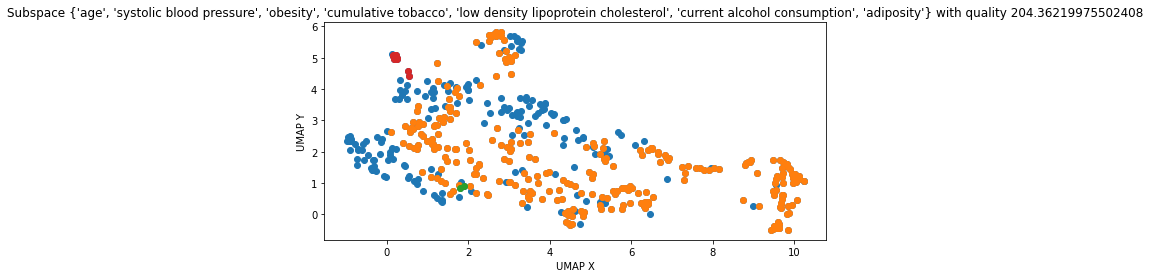

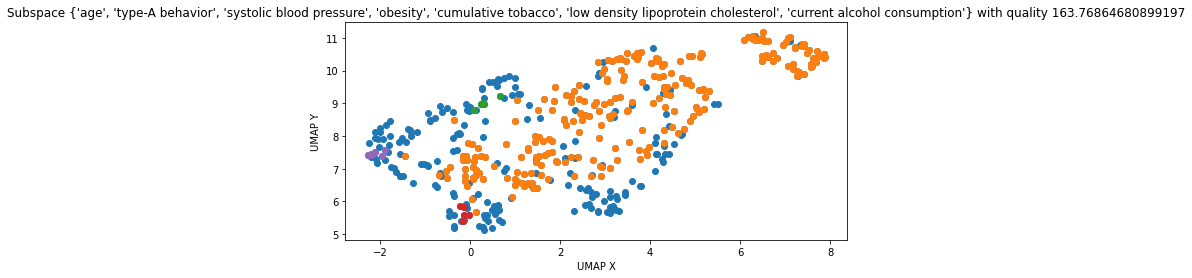

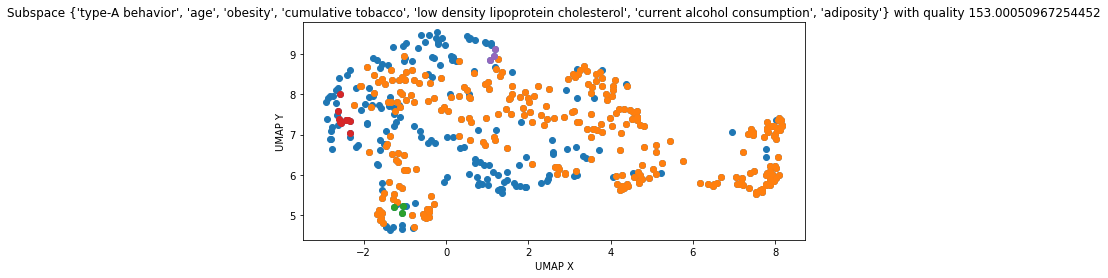

In [939]:
C_min_max_no_bin, S_min_max_no_bin, df_C_min_max_no_bin = ps.fullSUBCLU(X.drop("family history of heart disease",axis=1), eps=0.2, m=5, verbose=1, draw_results=True, draw_limit=5, scaler=sklearn.preprocessing.MinMaxScaler())

# Viz métriques

In [791]:
def volde(d,eps):
    return (math.sqrt(math.pi**d)/gamma(d/2+1)) * eps**d

In [801]:
list(map(lambda x:volde(x,0.5), range(1,10)))

[1.0,
 0.7853981633974483,
 0.5235987755982989,
 0.30842513753404244,
 0.16449340668482262,
 0.08074551218828077,
 0.03691223414321407,
 0.0158543442438155,
 0.006442400200661535]

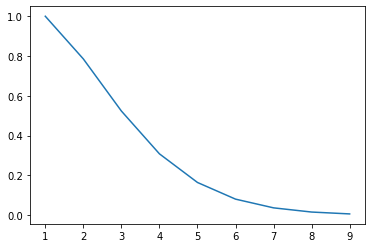

In [803]:
plt.plot(range(1,10),list(map(lambda x:volde(x,0.5), range(1,10))))

# SUBCLU sur les explications

In [6]:
X

,systolic blood pressure,cumulative tobacco,low density lipoprotein cholesterol,adiposity,family history of heart disease,type-A behavior,obesity,current alcohol consumption,age
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49
...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40


In [35]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2, random_state=42)

In [78]:
from sklearn import ensemble
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=1000, max_depth=3)

In [79]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=1000)

In [80]:
print(sklearn.metrics.accuracy_score(y_train, rf.predict(X_train)))
print(sklearn.metrics.accuracy_score(y_test, rf.predict(X_test)))

0.7913279132791328
0.7311827956989247


In [81]:
import shap

In [82]:
explainer = shap.TreeExplainer(rf, X, model_output="probability")
explanation = explainer(X)

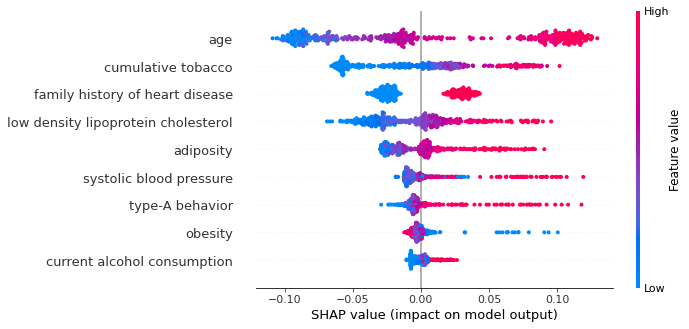

In [93]:
shap.plots.beeswarm(explanation[:,:,1])

In [95]:
reducer = umap.UMAP()

In [97]:
X_umap = reducer.fit_transform(X)

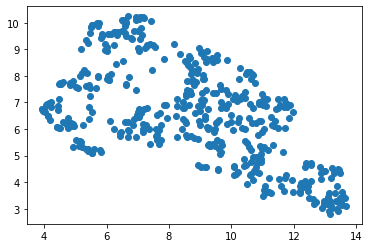

In [101]:
plt.scatter(X_umap[:,0],X_umap[:,1])

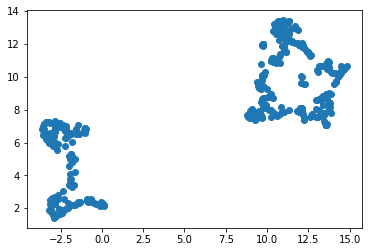

In [124]:
shap_umap = reducer.fit_transform(explanation.values[:,:,1])
plt.scatter(shap_umap[:,0],shap_umap[:,1])

In [107]:
reload(ps)

<module 'py_subclu' from 'C:\\Users\\emmanuel.doumard\\Documents\\These\\Subspace_Clustering\\python_subclu\\py_subclu.py'>

[-1  0  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  2 -1 -1 -1 -1 -1 -1 -1 -1 -1  0
 -1 -1 -1 -1 -1  0  3 -1 -1 -1 -1 -1 -1 -1  4 -1 -1 -1  2 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1  3  2 -1 -1 -1 -1  4  2 -1
 -1  2 -1 -1  0  0 -1 -1 -1 -1 -1 -1  2 -1 -1  3 -1 -1  2 -1 -1 -1 -1 -1
 -1  3 -1 -1  3 -1  1 -1  4 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1  4
 -1  4  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1  4 -1
 -1 -1 -1  3 -1 -1 -1 -1  4 -1 -1 -1  2 -1 -1 -1  4 -1  2 -1  2 -1 -1 -1
 -1 -1 -1  4  1 -1  5 -1  3  2 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1  3 -1
 -1 -1  2  2  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  2 -1
 -1 -1 -1 -1  2 -1 -1  3 -1 -1 -1 -1  0 -1 -1 -1  5  4 -1 -1  5 -1  4  2
 -1  3 -1 -1  5 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1  3 -1 -1  2 -1 -1 -1
  3  2  2 -1 -1 -1  5 -1  2 -1 -1 -1 -1  3  2  2 -1 -1 -1 -1 -1  2  2  2
  2 -1  2 -1 -1 -1 -1 -1  2  2 -1 -1  3 -1 -1  5  2 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  3 -1 -1 -1 -1  3 -1 -1 -1 -1 -1  2 -1

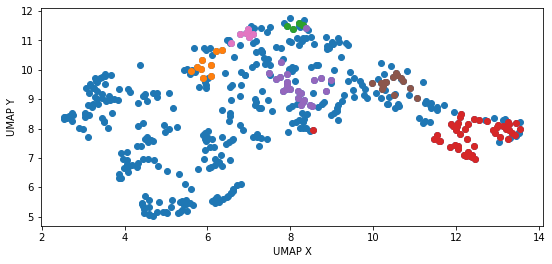

In [114]:
ps.basic_dbscan_plot(X, eps=10,m=5)

[ 0  1  2  5  2  2  2  0  2 -1 -1  2  2  2  0  2  2 -1  0  0 -1  2  0  1
 -1  2  2  1  0  1  2  2  0  2  2 -1  2  2  2 -1  2  2  2  0  2  2  0  2
  2  2  2  2  2  2  1  2  2  2  2  0  2  2  0  2  2  0  2  2  2  2  3 -1
  2  3  2  2  1  0  4  2  2  1  0  1  2  2 -1  2  2  1  2  1  2  2  4  1
  2  2 -1  2 -1  2  2  2  2  1  1  5  2  2  2 -1  2 -1 -1 -1  2  2  0  2
  1  2  2  1  2 -1  2  2  1  0  1  1  2  1  2  0  2  2  2 -1  1 -1  2  1
  2  2  2  2  2  1  1  1  2  2  2  0  2 -1  2  2  2 -1  2  2  2 -1  1  2
  2  2 -1  2  2 -1  0  0  2  2  2  1  1 -1  5  2  2  2  1  2  0  0  2 -1
  2  2  2  2  2  2  0  2  2  2  2  1  0  2  2  0  1  0  1 -1  2  1  2  1
 -1  2  2  4  2 -1  1  2  1  2 -1  1  0 -1  0  1  1  2  2  1  1  5  2  2
 -1  2 -1  1  0  1  0  0  1  0  2  2  1  2  2  0  2  2  1  2  3  2  0  2
  0  2  2  1  2  2 -1 -1  2  2  1  0  5  2  3  2  2  2 -1  2 -1  2  2  2
  2  2  2  2  2 -1  2  2  2  2  2  0  2  2 -1 -1  2  2  2 -1  2  2  5  2
  0 -1 -1  1  2  2 -1  1  0  2  1  0  1 -1  0  2  2

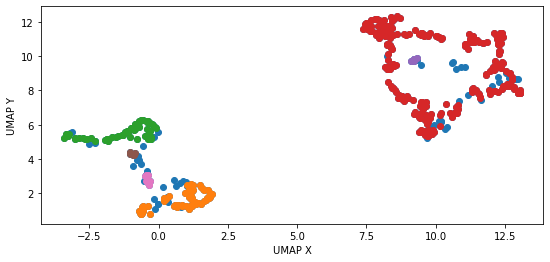

In [126]:
ps.basic_dbscan_plot(explanation.values[:,:,1], eps=0.05,m=5)

Computing 2-dim clusters


  0%|          | 0/36 [00:00<?, ?it/s]

Computing 3-dim clusters


  0%|          | 0/84 [00:00<?, ?it/s]

Computing 4-dim clusters


  0%|          | 0/126 [00:00<?, ?it/s]

Computing 5-dim clusters


  0%|          | 0/126 [00:00<?, ?it/s]

Computing 6-dim clusters


  0%|          | 0/84 [00:00<?, ?it/s]

Computing 7-dim clusters


  0%|          | 0/36 [00:00<?, ?it/s]

Computing 8-dim clusters


  0%|          | 0/9 [00:00<?, ?it/s]

Computing 9-dim clusters


  0%|          | 0/1 [00:00<?, ?it/s]

Computing 10-dim clusters


0it [00:00, ?it/s]

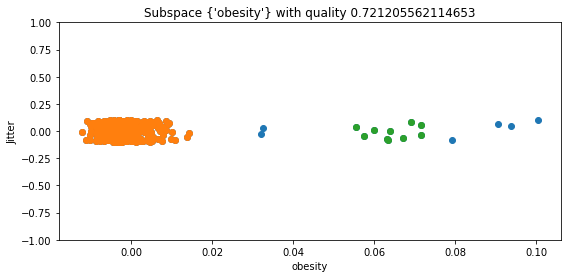

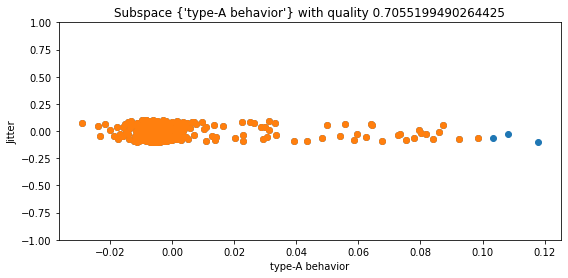

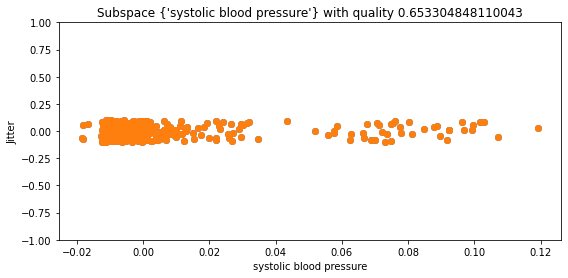

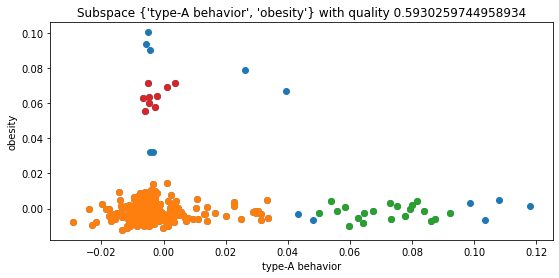

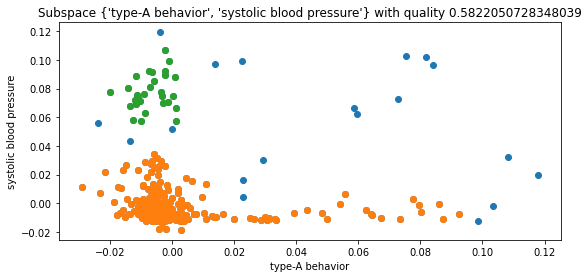

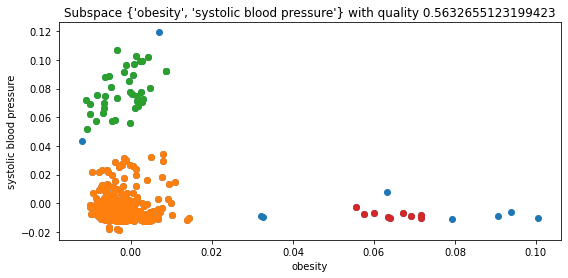

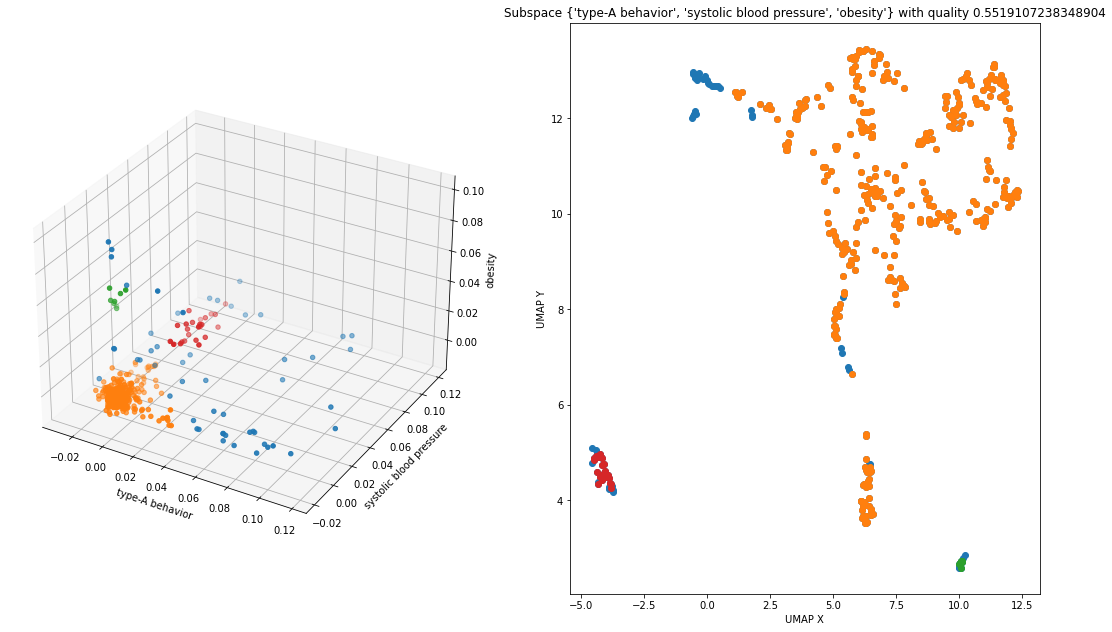

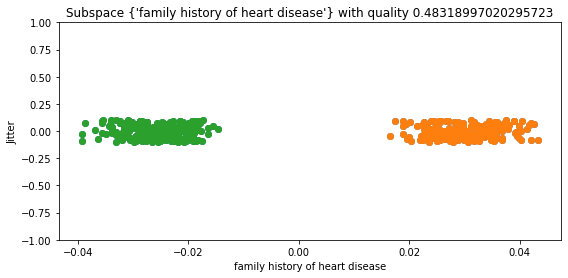

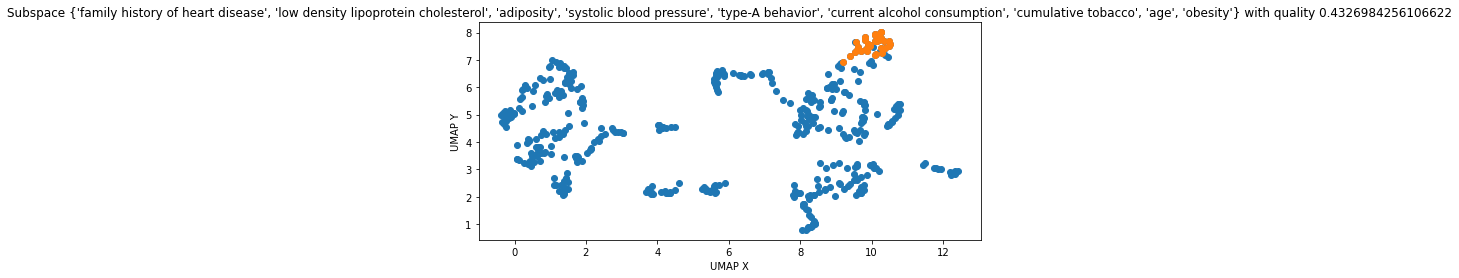

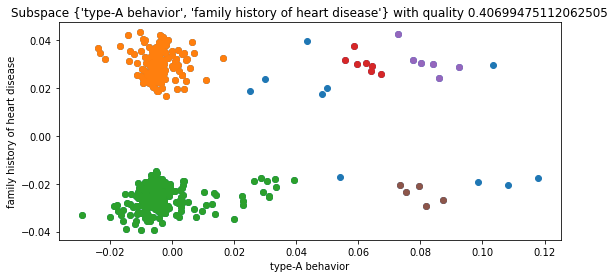

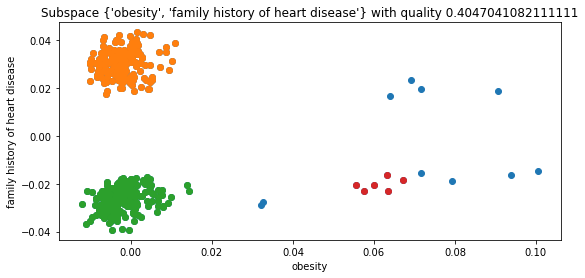

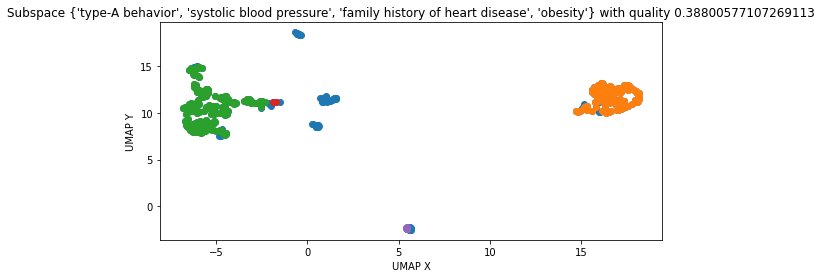

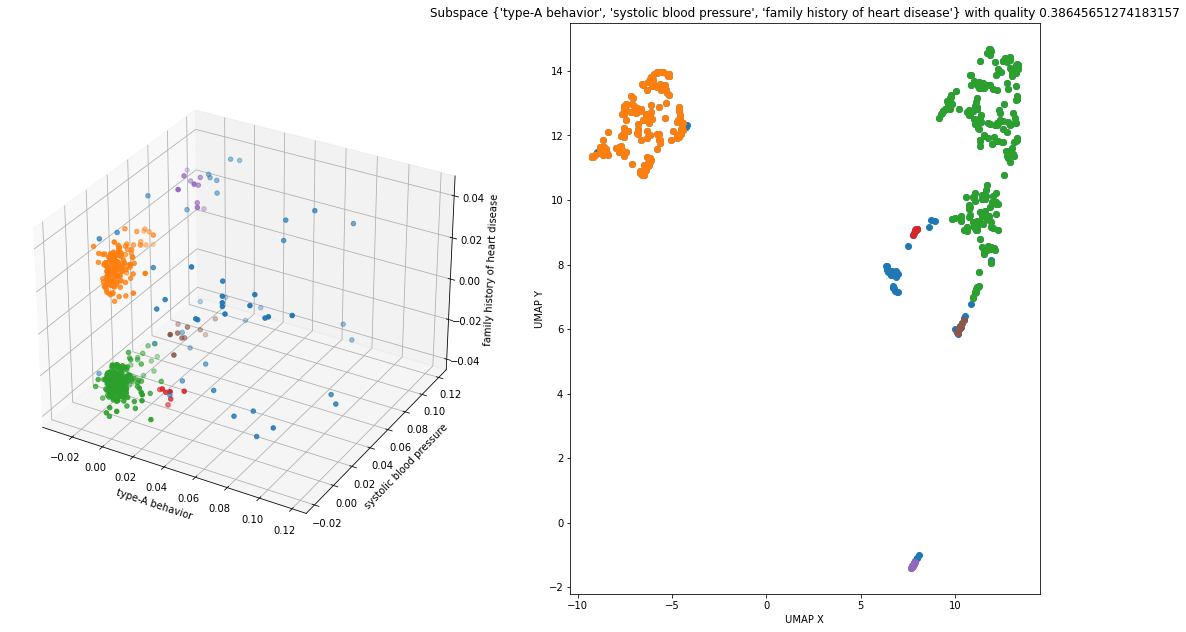

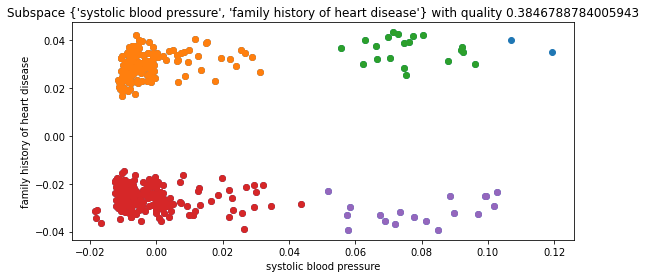

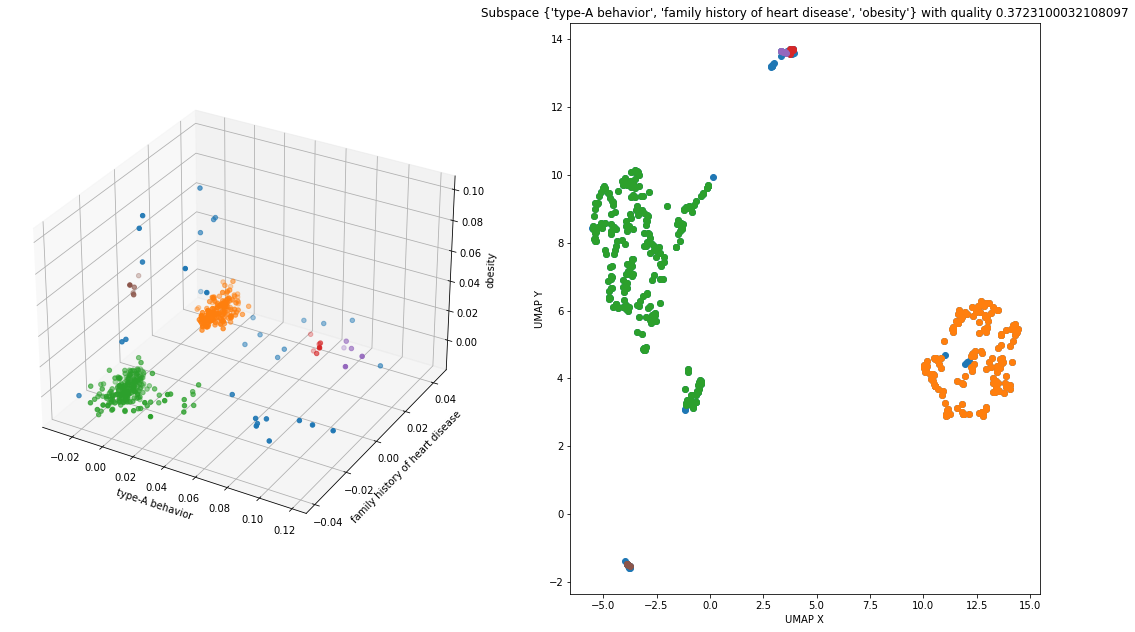

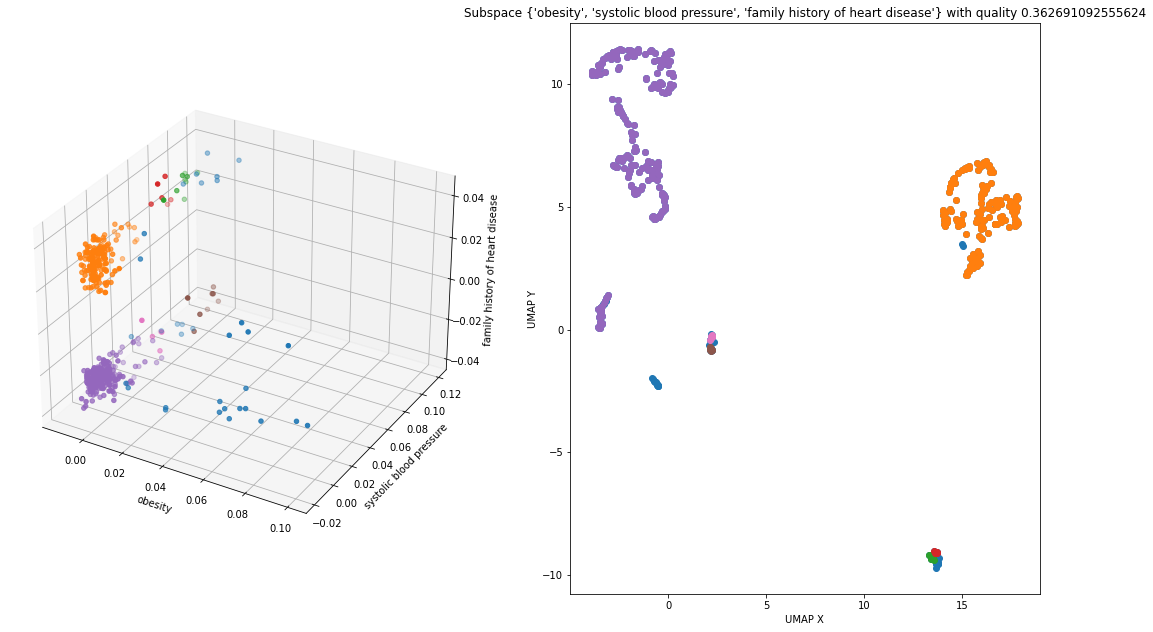

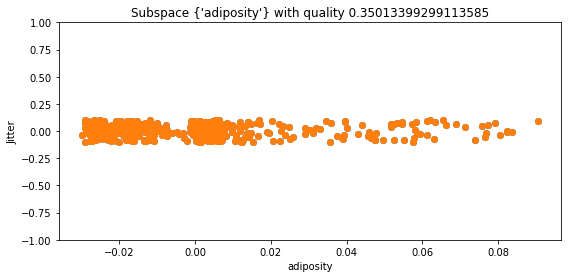

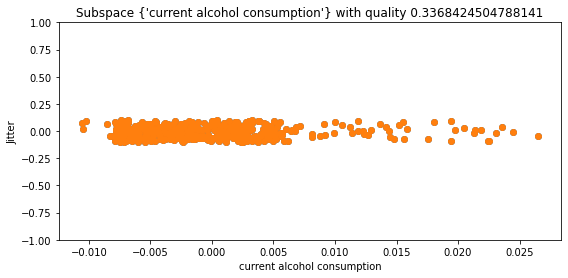

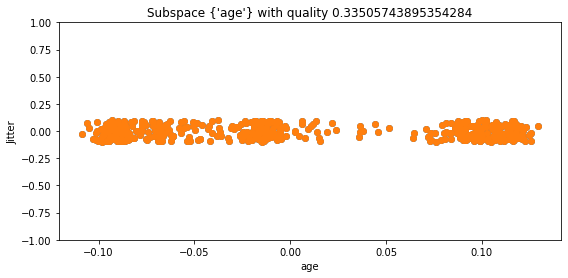

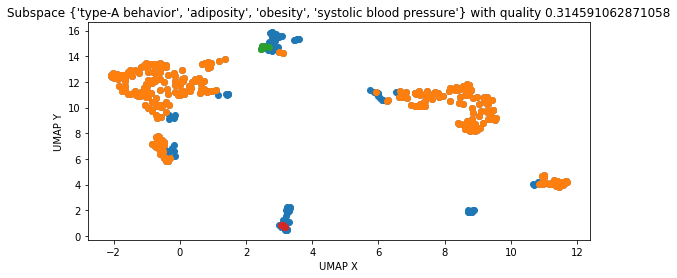

In [176]:
C, S, df_C = ps.fullSUBCLU(pd.DataFrame(explanation.values[:,:,1], columns=explanation.feature_names),eps=0.5,m=5, draw_limit=20)

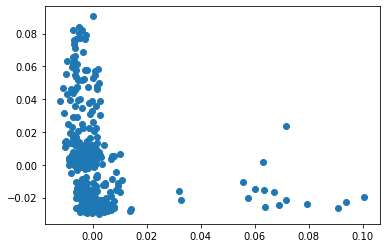

In [133]:
plt.scatter(explanation[:,"obesity",1].values,explanation[:,"adiposity",1].values)

# Agglomerative clustering sur les explications

In [144]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

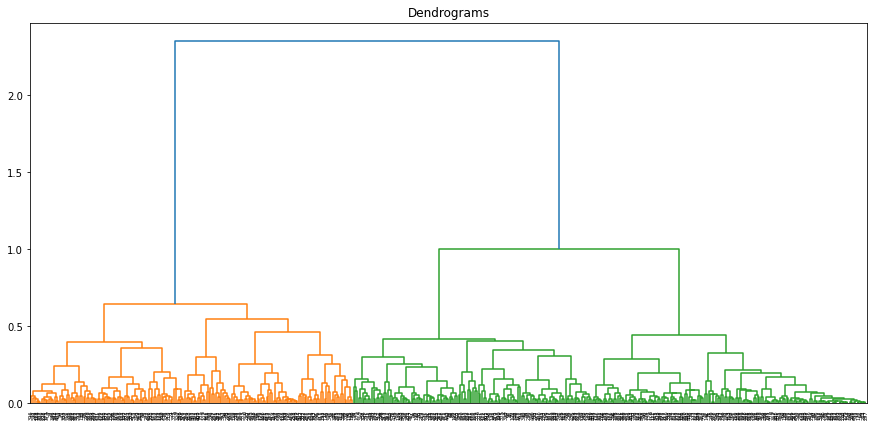

In [175]:
plt.figure(figsize=(15, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(explanation[:,:,1].values, method='ward'))

In [153]:
n_clusters = 5
clustering = AgglomerativeClustering(n_clusters=n_clusters).fit(explanation[:,:,1].values)
#kmeans_labels = cluster.KMeans(n_clusters=10).fit_predict(adataXGB.adata.layers['shapValuesContextualized'])

In [154]:
clusterable_embedding = umap.UMAP(
    n_neighbors=20,
    min_dist=0.1,
    n_components=2,
    random_state=42,
).fit_transform(explanation[:,:,1].values)

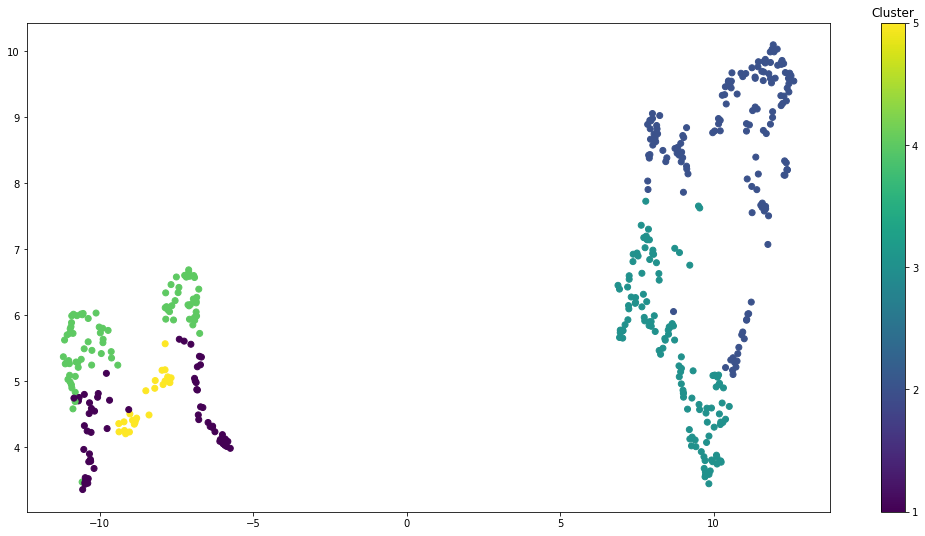

In [168]:
plt.figure(figsize=(18,9))
sc = plt.scatter(clusterable_embedding[:, 0], 
            clusterable_embedding[:, 1], 
            c=clustering.labels_,
            cmap="viridis")
cb = plt.colorbar(sc)
cb.set_alpha(1)
cb.ax.set_title("Cluster")
tick_locs = (np.arange(n_clusters))*(n_clusters)/n_clusters
cb.set_ticks(tick_locs)
cb.set_ticklabels(np.arange(n_clusters)+1)
cb.draw_all()
#plt.savefig("figures/umap_context_agglo_10clusters.jpg")
plt.show()